In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [15]:
# import MNIST dataset from tensorflow with one hot encoding style
from tensorflow.examples.tutorials import mnist
mnist = mnist.input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [16]:
# Find the shape of the dataset. The image is unfolded to a single dimension
mnist.train.images.shape

(55000, 784)

In [17]:
sample_image = mnist.train.images[0].reshape(28, 28)

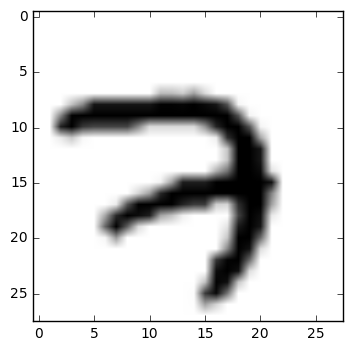

In [18]:
# Plot the image using colour map which can be hot, rainbow, Greys, etc.
plt.imshow(sample_image).set_cmap('Greys')

In [19]:
# Check the training label 
mnist.train.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [20]:
# Define hyperparameters
learning_rate = 0.01
epochs = 1000
batch_size = 100

In [21]:
# Create placeholder variables which will be assigned values later when we run the session
x = tf.placeholder(tf.float32, [None, 784])
label = tf.placeholder(tf.float32, [None, 10])

# Create variables for weights and bias
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Create a neural network 
y = tf.nn.softmax(tf.matmul(x, W)+ b)
y

<tf.Tensor 'Softmax_1:0' shape=(?, 10) dtype=float32>

In [22]:
# Calculate the cross entropy error based on the predicted and the correct output
cross_entropy = - tf.reduce_sum(label* tf.log(y))

# Define a training operation using GradientDescentOptimizer with a learning rate of 0.01
# Minimize the cross entropy error
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

In [23]:
# Initialise all the variables and run this in the session
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

In [24]:
# For epochs train in batches of size batch_size
# Run the values through gradient descent algorithm
for i in range(epochs):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    sess.run(train_step, feed_dict={x: batch_xs, label: batch_ys})

In [25]:
# Check the prediction acuuracy
correct_prediction = tf.equal(tf.arg_max(y, 1), tf.arg_max(label, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))
print sess.run(accuracy, feed_dict={x: mnist.test.images, label:mnist.test.labels})

0.9018
